In [2]:
import sqlite3
from tkinter import *
from mainpg import *
from tkinter import messagebox
from tkinter.simpledialog import askstring
from tkinter.messagebox import showinfo
from tkinter.ttk import *
import time
import pandas as pd
import numpy as np
import requests
from bs4 import  BeautifulSoup
import bs4
conn = sqlite3.connect('Database.db')

In [2]:
def  price_x(symbol):
    r = requests.get('https://finance.yahoo.com/quote/' + symbol + '?p=' + symbol)
    soup = bs4.BeautifulSoup(r.text,"lxml")
    price = soup.find("div",{'class': "My(6px) Pos(r) smartphone_Mt(6px)"})
    a = price.find("span").text
    a= str(a)
    flag = False
    if ','in a:
        pr = a.replace(',' ,'')
        return pr
    else:
        return a

In [15]:
def TotalValue(user_id):
    conn = sqlite3.connect('Database.db')
    cur = conn.cursor()
    cur.execute("""SELECT starting_cash FROM
    user_money WHERE user_id = ?""",(user_id,))
    cash = cur.fetchall()
    cash =str(cash)
    cash = cash.strip("([,])")
    cash = float(cash)

    cur.execute("""SELECT symbol,qty,purchase_price FROM
    portfolio WHERE user_id = ?""",(user_id,))

    a =cur.fetchall()
    df = pd.DataFrame(a,columns= ["symbol","qty","purchase price"])
    df["curr price"] = [float(price_x(x)) for x in df.symbol]
    x =list()
    for i in range(len(df["curr price"])):
        x.append((df["curr price"][i]*df["qty"][i]))
    f= False
    df ["total value"] = x
    y =list()
    for i in range(len(x)):
        s = (df ["total value"][i]) - (df["qty"][i] * df["purchase price"][i])
        y.append(s)
    df ["Total gain/loss"] = y
    return df
print(TotalValue("Yousuf"))

  symbol  qty  purchase price  curr price  total value  Total gain/loss
0   AMZN    2         3116.42     3116.42      6232.84              0.0
1     FB    1          273.55      273.55       273.55              0.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

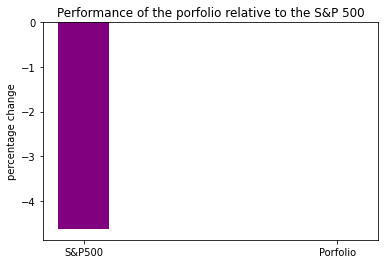

In [23]:
def plot(user_id):
    cur = conn.cursor()
    cur.execute("""SELECT return FROM
    user_return WHERE user_id = ?""",(user_id,))
    ret = cur.fetchall()
    ret =str(ret)
    ret = ret.strip("([,])")
    ret = float(ret)
    cur.execute("""SELECT change FROM
    dashboard WHERE Indx = ?""",("^GSPC",))
    val = cur.fetchall()
    val =str(val)
    val = val.strip("([,])")
    val = float(val)
    data = {"S&P500":val,"Porfolio":ret}
    x= list(data.keys())
    y= list(data.values())
    plt.figsize = (5,4)
    plt.title("Performance of the porfolio relative to the S&P 500")
    plt.ylabel("percentage change")
    plt.bar(x,y,color =['purple',"yellow"],  
        width = 0.2)
    plt.show()
plot("Yousuf")

In [19]:
SnP = pd.read_csv("^GSPC.csv")
pd.to_datetime(SnP["Date"])

0      2000-12-13
1      2000-12-14
2      2000-12-15
3      2000-12-18
4      2000-12-19
          ...    
5026   2020-12-07
5027   2020-12-08
5028   2020-12-09
5029   2020-12-10
5030   2020-12-11
Name: Date, Length: 5031, dtype: datetime64[ns]

In [20]:
NDQ = pd.read_csv("^IXIC.csv")
pd.to_datetime(NDQ["Date"])

0      2000-12-13
1      2000-12-14
2      2000-12-15
3      2000-12-18
4      2000-12-19
          ...    
5026   2020-12-07
5027   2020-12-08
5028   2020-12-09
5029   2020-12-10
5030   2020-12-11
Name: Date, Length: 5031, dtype: datetime64[ns]

In [21]:
R = pd.read_csv("^RUT.csv")
R.dropna(inplace=True)
pd.to_datetime(R["Date"])

0      2000-12-13
1      2000-12-14
2      2000-12-15
3      2000-12-18
4      2000-12-19
          ...    
5026   2020-12-07
5027   2020-12-08
5028   2020-12-09
5029   2020-12-10
5030   2020-12-11
Name: Date, Length: 5030, dtype: datetime64[ns]

In [15]:
R.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [24]:
cur = conn.cursor()
for i in range(5030):
    cur.execute("""INSERT into snp500 values(?,?,?,?,?,?)""",(SnP["Date"][i],SnP["Open"][i],
    SnP["High"][i],SnP["Low"][i],SnP["Adj Close"][i],SnP["Volume"][i]))
    conn.commit()

In [25]:
cur = conn.cursor()
for i in range(5030):
    cur.execute("""INSERT into russell2000 values(?,?,?,?,?,?)""",(R["Date"][i],R["Open"][i],
    R["High"][i],R["Low"][i],R["Adj Close"][i],R["Volume"][i]))
    conn.commit()

KeyError: 4981

In [28]:
cur = conn.cursor()
for i in range(5030):
    cur.execute("""INSERT into nasdaq values(?,?,?,?,?,?)""",(NDQ["Date"][i],NDQ["Open"][i],
    NDQ["High"][i],NDQ["Low"][i],NDQ["Adj Close"][i],NDQ["Volume"][i]))
    conn.commit()

In [26]:
R

(5030, 7)

In [27]:
NDQ.shape

(5031, 7)

In [ ]:
.shape